In [5]:
from tensorflow import keras
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from PIL import Image
import numpy as np
import os
%matplotlib inline
from tqdm import tqdm
import seaborn as sns
import keras.utils as image
import cv2
import glob
import math
import matplotlib.image as mpimg

In [6]:
images = []
for img_path in glob.glob('DRIVE/training/images//*'):
 images.append(mpimg.imread(img_path , format='jpeg'))
plt.figure(figsize=(30,30))

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

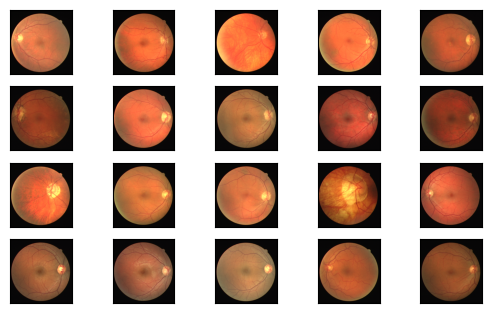

In [7]:
columns = 5
for i, image in enumerate(images):
 plt.subplot(math.ceil(len(images) / columns + 1), columns, i + 1)
 plt.imshow(image)
 plt.xticks([])
 plt.yticks([])

In [8]:
for img_path in glob.glob('DRIVE/training/images//*'):
 images.append(mpimg.imread(img_path , format='jpeg'))
plt.figure(figsize=(30,30))

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

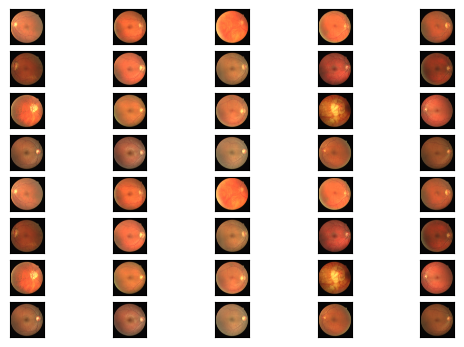

In [9]:
columns = 5
for i, image in enumerate(images):
 plt.subplot(math.ceil(len(images) / columns + 1), columns, i + 1)
 plt.imshow(image)
 plt.xticks([])
 plt.yticks([])

In [10]:
for i in glob.glob('DRIVE/training/images/*'):
    print(i.split('/')[-1][7:])

21_training.tif
22_training.tif
23_training.tif
24_training.tif
25_training.tif
26_training.tif
27_training.tif
28_training.tif
29_training.tif
30_training.tif
31_training.tif
32_training.tif
33_training.tif
34_training.tif
35_training.tif
36_training.tif
37_training.tif
38_training.tif
39_training.tif
40_training.tif


In [11]:
import cv2, os
base_path = "DRIVE/training/images/"
new_path = "DRIVE/test/images/"
for infile in os.listdir(base_path):
    print ("file : " + infile)
    read = cv2.imread(base_path + infile)
    outfile = infile.split('.')[0] + '.png'
    cv2.imwrite(new_path+outfile,read,[int(cv2.IMWRITE_JPEG_QUALITY),200])

file : 21_training.tif
file : 22_training.tif
file : 23_training.tif
file : 24_training.tif
file : 25_training.tif
file : 26_training.tif
file : 27_training.tif
file : 28_training.tif
file : 29_training.tif
file : 30_training.tif
file : 31_training.tif
file : 32_training.tif
file : 33_training.tif
file : 34_training.tif
file : 35_training.tif
file : 36_training.tif
file : 37_training.tif
file : 38_training.tif
file : 39_training.tif
file : 40_training.tif


In [12]:
from PIL import Image
import glob
manual_path = glob.glob("DRIVE/training/1st_manual/*")
for gif in manual_path:
 img = Image.open(gif)
 name = gif.split("\\")[-1]
 name = name.split('.')[0]
 img.save("DRIVE/test/1st_manual/"+name+".png",'png', optimize=True, quality=70)

In [13]:
manual_path = glob.glob("DRIVE/training/mask/*")
for gif in manual_path:
 img = Image.open(gif)
 name = gif.split("\\")[-1]
 name = name.split('.')[0]
 img.save("DRIVE/test/mask/"+name+".png",'png', optimize=True, 
quality=70)
dataset_path = 'DRIVE/test/images/'
train_path = os.path.join(dataset_path, '*')
train_path = glob.glob(train_path)
train_path[4]

'DRIVE/test/images\\05_test.tif'

Text(0.5, 0.98, 'Original & RGB image channels')

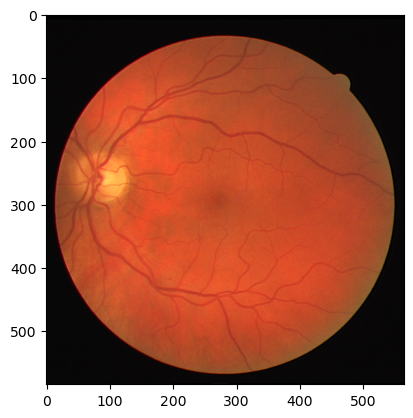

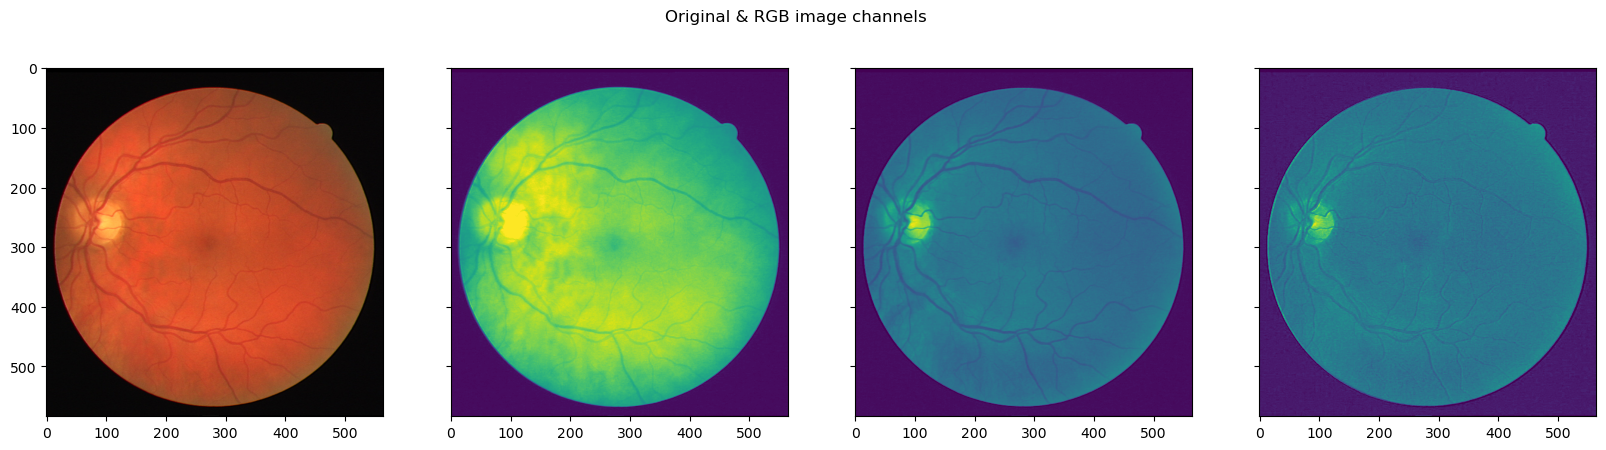

In [14]:
from skimage.io import imread
image = imread(train_path[4]) 
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 
im1.imshow(image) #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

Found 193561 images belonging to 4 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


193561
(256, 256, 3)


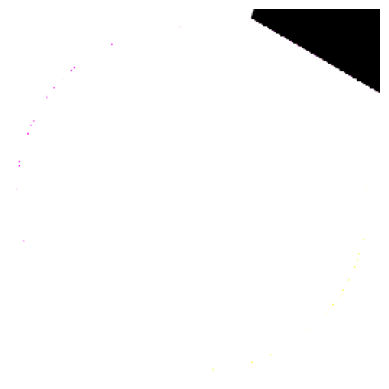

In [15]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, fill_mode='nearest')
dir_It = datagen.flow_from_directory(
"DRIVE/test/",
 batch_size=1,
 save_to_dir="DRIVE/test/2nd_manual",
 save_prefix="",
 save_format='png',
)
print(len(dir_It))
for img_batch, labels in dir_It:
 img = img_batch[0] # Access the first image in the batch
 print(img.shape)
 plt.imshow(img) # Display the image
 plt.axis('off') # Hide axis
 plt.show()
 break

In [16]:
print(len(dir_It))

193561


In [17]:
datagen = keras.preprocessing.image.ImageDataGenerator(
 rescale=1./255,
 rotation_range=180,
 width_shift_range=0.2,
 height_shift_range=0.2,
)

Found 193562 images belonging to 4 classes.
(256, 256, 3)


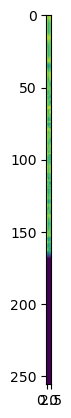

In [18]:
dir_It = datagen.flow_from_directory(
"DRIVE/test/",
 batch_size=1,
 save_to_dir="DRIVE/test/2nd_manual",
 save_prefix="",
 save_format='png',
)
for _ in range(len(dir_It)):
#img, label = dir_It.next()
 print(img.shape) # (1,256,256,3)
 plt.imshow(img[0])
#plt.axis('off')
 plt.show()
 break

Found 193562 images belonging to 4 classes.
(256, 256, 3)


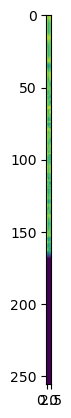

In [19]:
datagen =keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.5,2.0])
dir_It = datagen.flow_from_directory(
"DRIVE/test/",
 batch_size=1,
 save_to_dir="DRIVE/test/2nd_manual",
 save_prefix="",
 save_format='png',
)
for _ in range(len(dir_It)):
#img, label = dir_It.next()
 print(img.shape) # (1,256,256,3)
 plt.imshow(img[0])
 plt.show()
 break

Found 193562 images belonging to 4 classes.
(256, 256, 3)


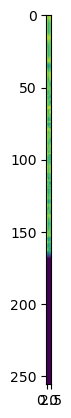

In [20]:
datagen =keras.preprocessing.image.ImageDataGenerator(featurewise_center =True,featurewise_std_normalization = True)
dir_It = datagen.flow_from_directory(
"DRIVE/test/",
 batch_size=1,
 save_to_dir="DRIVE/test/2nd_manual",
 save_prefix="",
 save_format='png',
)
for _ in range(len(dir_It)):
#img, label = dir_It.next()
 print(img.shape) # (1,256,256,3)
 plt.imshow(img[0])
 plt.show()
 break

In [21]:
data_path ='DRIVE/test'
class_data= ['2nd_manual']
len_class_data = len(class_data)
print(len_class_data)
image_count = {}
train_data = []
for i , class_data in tqdm(enumerate(class_data)):
 class_folder = os.path.join(data_path,class_data)
 label = class_data
 image_count[class_data] = []

1


1it [00:00, ?it/s]


In [22]:
for path in os.listdir(os.path.join(class_folder)):
 image_count[class_data].append(class_data)
 train_data.append(['{}/{}'.format(class_data, path), i, class_data])
for key, value in image_count.items():
    print('{0} -> {1}'.format(key, len(value)))

2nd_manual -> 193482


In [23]:
df = pd.DataFrame(train_data, columns=['file', 'id', 'label'])
df.shape
df.head()
df = pd.DataFrame(train_data, columns=['file', 'id', 'label'])
df.shape
df.head()
df['file'][np.random.randint(160)]

'2nd_manual/_0_9638962.png'